# Rice-Leaf Diseasen Detecion

## Business Case

Rice-Leaf Diseasen Detecion aims to Create a model which can classify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot.

## Domain Analysis

### Data Attributes

**Leaf smut**  
**Brown spot**  
**Bacterial leaf blight**  
**__________________________**

**First we have to import basic Library**

In [188]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

#### we have to install  this two libraras ūsing pip install

In [189]:
#pip install opencv-python

In [190]:
#pip install tensorflow

In [191]:
# This is the OpenCV library, used for image processing
import  cv2 

# The main TensorFlow library, used for building and training neural networks.
import tensorflow  as tf

# A high-level API of TensorFlow used for building and training deep learning models.
from tensorflow import keras

# A Keras utility for generating batches of image data with real-time data augmentation.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Keras callbacks used to improve training by stopping early or saving the best model.
from keras.callbacks import EarlyStopping,ModelCheckpoint

In [192]:
# Define paths for each class directory
bacterial_leaf_blight_dir = "C:/Users/bunny/Downloads/project/PRCP-1001-RiceLeaf/Data/Bacterial leaf blight"
brown_spot_dir = "C:/Users/bunny/Downloads/project/PRCP-1001-RiceLeaf/Data/Brown spot"
leaf_smut_dir = "C:/Users/bunny/Downloads/project/PRCP-1001-RiceLeaf/Data/Leaf smut"

# Basic checks

In [193]:
# Check if each class directory exists
for class_dir in [bacterial_leaf_blight_dir, brown_spot_dir, leaf_smut_dir]:
    if not os.path.exists(class_dir):
        print(f"Directory '{class_dir}' does not exist.")
        exit()

### Code Explanation

**We have a list of directories :**  bacterial_leaf_blight,  brown_spot, and leaf_smut.   

The for loop goes through each directory in this list    


os.path.exists(class_dirchecks if the directory exists.    

If a directory does not exist, it prints a message saying "Directory 'directory_name' does not exist." and then stops the program with exit().
().

In [194]:
for class_dir in [bacterial_leaf_blight_dir, brown_spot_dir, leaf_smut_dir]:
    if not os.listdir(class_dir):
        print(f"Directory '{class_dir}' is empty.")
        exit()

Again, we go through each directory in the list.  

os.list dir(class_dir) lists all the files in the directory.  

If the directory is empty (i.e., os.listdir(class_dir) returns an empty list), it prints "Directory 'directory_name' is empty." and stops the program with exit().  
    

In [195]:
for class_name, class_dir in [("Bacterial leaf blight", bacterial_leaf_blight_dir),
                              ("Brown spot", brown_spot_dir),
                              ("Leaf smut", leaf_smut_dir)]:
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        try:
            img = cv2.imread(img_path)
            if img is None:
                print(f"Error reading '{img_file}' in '{class_name}' directory.")
                exit()
        except Exception as e:
            print(f"Error reading '{img_file}' in '{class_name}' directory:", e)
            exit()

print("Basic checks passed.")

Basic checks passed.


This part of the code does two things:   

It pairs each directory with a class name (e.g., "Bacterial leaf blight").  

It checks each file in these directories to see if it can be read as an image.  

The outer for loop goes through each pair of class name and directory.  

The inner for loop goes through each file in the current directory.  

os.path.join(class_dir, img_file) creates the full path to the image file.  

cv2.imread(img_path) tries to read the image file.  

If it can't read the image file (cv2.imread(img_path) returns None), it prints "Error reading 'file_name' in 'class_name' directory." and stops the program with exit().  

If there's any other error, it catches the error, prints a message with the error details, and stops the program.  

If all the checks are successful, it prints "Basic checks passed."

# EDA

In [196]:
def visualize_samples(class_dir, class_name, num_samples=5):
    # Print the class name to identify the category of the samples being displayed
    print(f"\n{class_name} Samples:")
    
    # Create a figure with a row of subplots. The number of subplots is specified by num_samples.
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    
    # Ensure that axes is a flat array, which simplifies indexing in the loop
    axes = axes.flatten()
    
    for i in range(num_samples):
        # Randomly select an image file from the directory
        img_file = np.random.choice(os.listdir(class_dir))
        
        # Construct the full file path to the selected image
        img_path = os.path.join(class_dir, img_file)
        
        # Read the image from the file
        img = cv2.imread(img_path)
        
        # Convert the image from BGR (default in OpenCV) to RGB (default in Matplotlib)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Display the image on the ith subplot
        axes[i].imshow(img)
        
        # Set the title of the subplot to indicate the sample number
        axes[i].set_title(f"Sample {i+1}")
        
        # Hide the axis for a cleaner look
        axes[i].axis('off')
    
    # Display the entire figure with all subplots
    plt.show()


**First 2 lines**

class_dir: The directory where the images are stored.  

class_name: The name of the category these images belong to (e.g., "Bacterial leaf blight").  

num_samples: The number of sample images to display (default is 5).  

This line prints the name of the category to identify which samples are being displayed.  


**3rd Liner**  

This creates a figure with a row of subplots.  

1, num_samples means there will be 1 row and num_samples columns.  

figsize=(15, 3) sets the size of the entire figure.  

**4th line**  

axes is an array of subplots.  

Flattening it makes it easier to loop through each subplot.  

**5th line**  

**for i in range(num_samples):** -- Loop num_samples times (e.g., 5 times if num_samples=5).  

**np.random.choice(os.listdir(class_dir)):**-- Randomly select an image file from the directory.  

**os.path.join(class_dir, img_file):**-- Create the full file path to the selected image.   

**cv2.imread(img_path):**-- Read the image from the file.  

**cv2.cvtColor(img, cv2.COLOR_BGR2RGB):** --Convert the image from BGR color space (used by OpenCV) to RGB color space (used by Matplotlib).  

**axes[i].imshow(img):**-- Display the image on the ith subplot.  
    
**axes[i].set_title(f"Sample {i+1}"):**-- Set the title of the subplot to indicate the sample number (e.g., "Sample 1").  

**axes[i].axis('off'):**-- Hide the axis for a cleaner look.  


In [197]:
def plot_class_distribution(class_counts):
    # Extract the class names (keys) and their corresponding counts (values) from the dictionary
    classes = list(class_counts.keys())
    counts = list(class_counts.values())
    
    # Create a new figure for the bar plot with a specified size
    plt.figure(figsize=(8, 5))
    
    # Create a bar plot with class names on the x-axis and their counts on the y-axis
    plt.bar(classes, counts, color='skyblue')
    
    # Label the x-axis
    plt.xlabel('Class')
    
    # Label the y-axis
    plt.ylabel('Number of Samples')
    
    # Add a title to the plot
    plt.title('Class Distribution')
    
    # Display the plot
    plt.show()


**class_counts:**  This is a dictionary where the keys are the names of the classes (e.g., "Bacterial Leaf Blight") and the values are the counts of samples in each class.   

**class_counts.keys():** This gets all the class names from the dictionary.     

**class_counts.values():** This gets all the sample counts from the dictionary.   
**list(...):** This converts the dictionary keys and values into lists for easy handling.   

**plt.figure(...):** This creates a new figure for the plot.   

**figsize=(8, 5:):** This sets the size of the figure to be 8 inches wide and 5 inches tal.    

**plt.bar(...):** This creates a bar plot.       
    
**classes:** These are the labels on the x-axis (the class names).  

**counts:** These are the heights of the bars (the number of samples in each class).  
**color='skyblue':** This sets the color of the bars to sky blue.l   
      

**plt.xlabel(...):** This adds a label to the x-axis. Here, the label is "Class".     

**plt.ylabel(...):** This adds a label to the y-axis. Here, the label is "Number of Samples".     

**plt.title(...):** This adds a title to the plot. Here, the title is "Class Distribution".     

**plt.show():** This command displays the plot on the screen..
.g.


In [198]:
# Function to calculate and display image statistics
def image_statistics(class_dirs):
    for class_dir in class_dirs:
        # Extract the class name from the directory path
        class_name = os.path.basename(class_dir)
        
        # Initialize a list to store the sizes of the images
        image_sizes = []
        
        # Loop through each file in the directory
        for img_file in os.listdir(class_dir):
            # Construct the full file path
            img_path = os.path.join(class_dir, img_file)
            
            # Read the image from the file
            img = cv2.imread(img_path)
            
            # Append the image size (height, width) to the list
            image_sizes.append(img.shape[:2])
        
        # Convert the list of image sizes to a NumPy array for easier statistical calculations
        image_sizes = np.array(image_sizes)
        
        # Print the class name and image statistics
        print(f"\n{class_name} Image Statistics:")
        print("  - Mean Height:", np.mean(image_sizes[:, 0]))
        print("  - Mean Width:", np.mean(image_sizes[:, 1]))
        print("  - Median Height:", np.median(image_sizes[:, 0]))
        print("  - Median Width:", np.median(image_sizes[:, 1]))
        print("  - Minimum Height:", np.min(image_sizes[:, 0]))
        print("  - Minimum Width:", np.min(image_sizes[:, 1]))
        print("  - Maximum Height:", np.max(image_sizes[:, 0]))
        print("  - Maximum Width:", np.max(image_sizes[:, 1]))


**class_dirs:** This is a list of directories where the images are stored. Each directory corresponds to a different class of images.  

This loop iterates over each directory in the class_dirs list.  

**os.path.basename(class_dir):** This extracts the last part of the directory path, which is assumed to be the class name.

**image_sizes:** This list will store the sizes (height and width) of all images in the current directory.  

This loop iterates over each file in the current directory.  

**os.path.join(class_dir, img_file):** This creates the full path to the image file.  

**cv2.imread(img_path):** This reads the image file into a variable img.  

**img.shape[:2]:** This gets the height and width of the image.  

**image_sizes.append(...):** This adds the image size (height, width) to the image_sizes list.  

**np.array(image_sizes):** This converts the list of image sizes to a NumPy array for easier statistical calculations.  

printing all mean,median,minimum,maximum heights and widths  


In [199]:
 # Define the directories containing images for each class
 class_dirs = [bacterial_leaf_blight_dir, brown_spot_dir, leaf_smut_dir]


Bacterial leaf blight Samples:


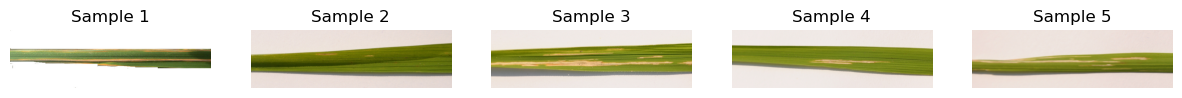


Brown spot Samples:


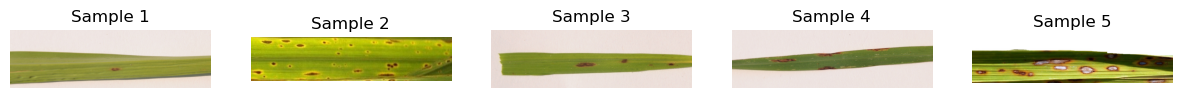


Leaf smut Samples:


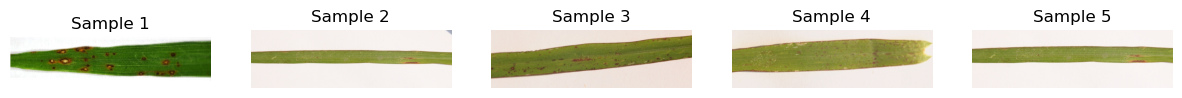

In [200]:
 # Visualize sample images from each class
for class_dir in class_dirs:
    class_name = os.path.basename(class_dir)
    visualize_samples(class_dir, class_name)

This line starts a loop that will go through each directory listed in class_dirs.  

class_dirs is a list of directories, where each directory contains images of a specific class.  
__

os.path.basename(class_dir): This extracts the last part of the directory path, which is assumed to be the class name.  

For example, if class_dir is 'path/to/bacterial_leaf_blight', class_name will be 'bacterial_leaf_blight'.  
__

This line calls the visualize_samples function for the current class_dir.  

visualize_samples(class_dir, class_name): This function takes two arguments:  

class_dir: The directory containing images of the class.  

**class_name:** The name of the class (used for labeling the visualizations).  

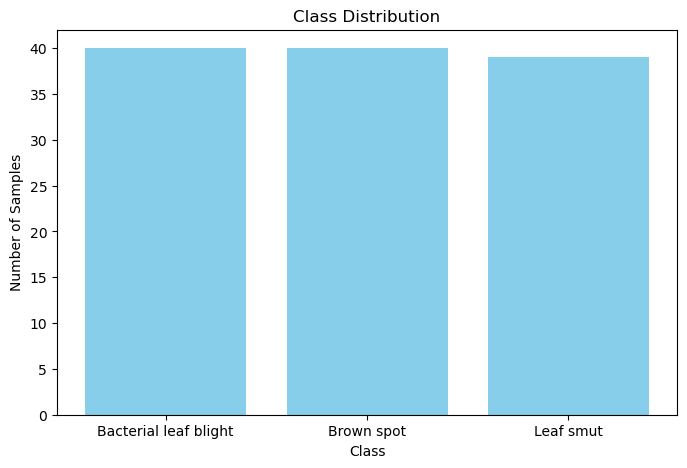

In [201]:
# Calculate and display class distribution
class_counts = {os.path.basename(class_dir): len(os.listdir(class_dir)) for class_dir in class_dirs}
plot_class_distribution(class_counts)

In [202]:
# Calculate and display image statistics
image_statistics(class_dirs)


Bacterial leaf blight Image Statistics:
  - Mean Height: 897.0
  - Mean Width: 3081.0
  - Median Height: 897.0
  - Median Width: 3081.0
  - Minimum Height: 897
  - Minimum Width: 3081
  - Maximum Height: 897
  - Maximum Width: 3081

Brown spot Image Statistics:
  - Mean Height: 589.175
  - Mean Width: 1951.275
  - Median Height: 897.0
  - Median Width: 3081.0
  - Minimum Height: 88
  - Minimum Width: 286
  - Maximum Height: 900
  - Maximum Width: 3081

Leaf smut Image Statistics:
  - Mean Height: 635.2307692307693
  - Mean Width: 2111.846153846154
  - Median Height: 897.0
  - Median Width: 3081.0
  - Minimum Height: 71
  - Minimum Width: 250
  - Maximum Height: 897
  - Maximum Width: 3081


## Data Preprocessing

In [203]:
# Initialize lists to hold the image data and labels
images = []
labels = []

# Define a function to load images from a directory and assign a specific label
def load_images_from_directory(directory_path, label):
    for filename in os.listdir(directory_path):
        # Construct the full path to the image file
        image_path = os.path.join(directory_path, filename)
        # Read the image
        image = cv2.imread(image_path)
        # Resize the image to 224x224 pixels
        image = cv2.resize(image, (224, 224))
        # Append the image data to the images list
        images.append(image)
        # Append the corresponding label to the labels list
        labels.append(label)

load_images_from_directory(bacterial_leaf_blight_dir, 0)  # Label 0 for bacterial leaf blight
load_images_from_directory(brown_spot_dir, 1)             # Label 1 for brown spot
load_images_from_directory(leaf_smut_dir, 2)              # Label 2 for leaf smut

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

**images:** This list will store the image data.  

**labels:** This list will store the corresponding labels for the images.  

**directory_path:** This is the path to the directory where images are stored.  

**label:** This is the label (or class identifier) that will be assigned to all images in this directory.  

This loop goes through each file in the specified directory.  

**os.path.join(directory_path, filename):** This creates the full path to the image file.  

**cv2.imread(image_path):** This reads the image from the file.  

**cv2.resize(image, (224, 224)):** This resizes the image to 224x224 pixels. Resizing ensures all images are the same size, which is often necessary for machine learning models.  

**images.append(image):** This adds the resized image to the images list.  

**labels.append(label):** This adds the corresponding label to the labels list.  

These lines call the load_images_from_directory function for each class directory:  
    
bacterial_leaf_blight_dir with label 0  
brown_spot_dir with label 1  
leaf_smut_dir with label 2  

**np.array(images):** This converts the images list to a NumPy array. NumPy arrays are more efficient for numerical operations, which is useful for machine learning.   

**np.array(labels):** This converts the labels list to a NumPy array.  


In [204]:
def plot_class_distribution(class_counts):
    # Extract the class names (keys) and their corresponding counts (values) from the dictionary
    classes = list(class_counts.keys())
    counts = list(class_counts.values())
    
    # Create a new figure for the bar plot with a specified size
    plt.figure(figsize=(8, 5))
    
    # Create a bar plot with class names on the x-axis and their counts on the y-axis
    plt.bar(classes, counts, color='skyblue')
    
    # Label the x-axis
    plt.xlabel('Class')
    
    # Label the y-axis
    plt.ylabel('Number of Samples')
    
    # Add a title to the plot
    plt.title('Class Distribution')
    
    # Display the plot
    plt.show()


In [205]:
# Function to calculate and display image statistics
def image_statistics(class_dirs):
    for class_dir in class_dirs:
        # Extract the class name from the directory path
        class_name = os.path.basename(class_dir)
        
        # Initialize a list to store the sizes of the images
        image_sizes = []
        
        # Loop through each file in the directory
        for img_file in os.listdir(class_dir):
            # Construct the full file path
            img_path = os.path.join(class_dir, img_file)
            
            # Read the image from the file
            img = cv2.imread(img_path)
            
            # Append the image size (height, width) to the list
            image_sizes.append(img.shape[:2])
        
        # Convert the list of image sizes to a NumPy array for easier statistical calculations
        image_sizes = np.array(image_sizes)
        
        # Print the class name and image statistics
        print(f"\n{class_name} Image Statistics:")
        print("  - Mean Height:", np.mean(image_sizes[:, 0]))
        print("  - Mean Width:", np.mean(image_sizes[:, 1]))
        print("  - Median Height:", np.median(image_sizes[:, 0]))
        print("  - Median Width:", np.median(image_sizes[:, 1]))
        print("  - Minimum Height:", np.min(image_sizes[:, 0]))
        print("  - Minimum Width:", np.min(image_sizes[:, 1]))
        print("  - Maximum Height:", np.max(image_sizes[:, 0]))
        print("  - Maximum Width:", np.max(image_sizes[:, 1]))


In [206]:
 # Define the directories containing images for each class
 class_dirs = [bacterial_leaf_blight_dir, brown_spot_dir, leaf_smut_dir]


Bacterial leaf blight Samples:


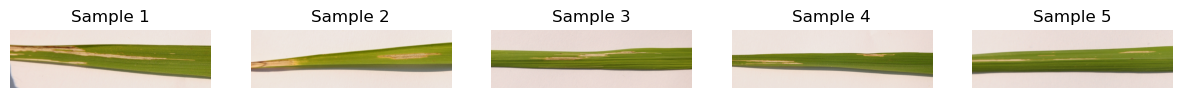


Brown spot Samples:


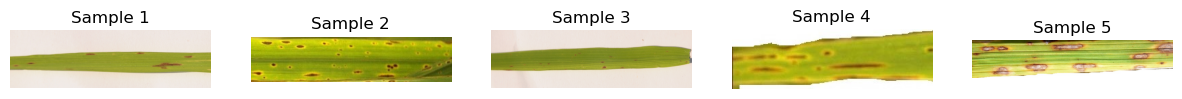


Leaf smut Samples:


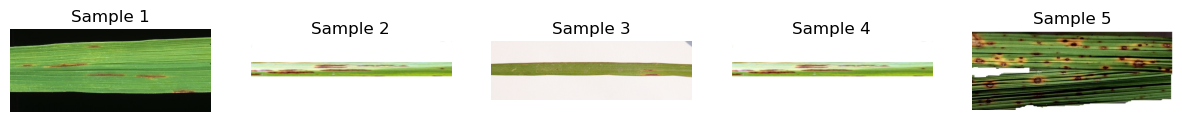

In [207]:
 # Visualize sample images from each class
for class_dir in class_dirs:
    class_name = os.path.basename(class_dir)
    visualize_samples(class_dir, class_name)

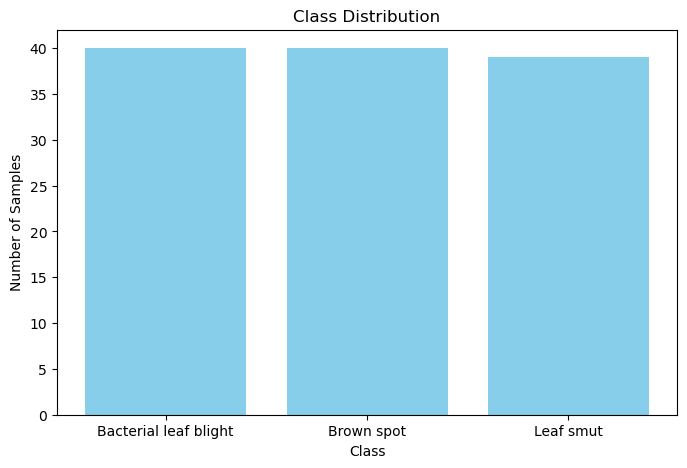

In [208]:
# Calculate and display class distribution
class_counts = {os.path.basename(class_dir): len(os.listdir(class_dir)) for class_dir in class_dirs}
plot_class_distribution(class_counts)

In [209]:
# Calculate and display image statistics
image_statistics(class_dirs)


Bacterial leaf blight Image Statistics:
  - Mean Height: 897.0
  - Mean Width: 3081.0
  - Median Height: 897.0
  - Median Width: 3081.0
  - Minimum Height: 897
  - Minimum Width: 3081
  - Maximum Height: 897
  - Maximum Width: 3081

Brown spot Image Statistics:
  - Mean Height: 589.175
  - Mean Width: 1951.275
  - Median Height: 897.0
  - Median Width: 3081.0
  - Minimum Height: 88
  - Minimum Width: 286
  - Maximum Height: 900
  - Maximum Width: 3081

Leaf smut Image Statistics:
  - Mean Height: 635.2307692307693
  - Mean Width: 2111.846153846154
  - Median Height: 897.0
  - Median Width: 3081.0
  - Minimum Height: 71
  - Minimum Width: 250
  - Maximum Height: 897
  - Maximum Width: 3081


In [210]:
# Display the resized images array
print("Resized Images Array:")
print(images)

Resized Images Array:
[[[[210 215 229]
   [208 214 227]
   [209 212 227]
   ...
   [210 215 230]
   [211 217 230]
   [211 216 229]]

  [[208 214 226]
   [208 214 227]
   [210 214 229]
   ...
   [210 215 230]
   [209 215 228]
   [210 215 231]]

  [[209 214 228]
   [209 214 228]
   [208 213 230]
   ...
   [209 215 228]
   [210 216 229]
   [211 215 233]]

  ...

  [[210 216 229]
   [207 215 228]
   [209 215 228]
   ...
   [210 214 225]
   [210 216 229]
   [210 215 228]]

  [[209 215 228]
   [207 212 227]
   [209 216 229]
   ...
   [210 214 225]
   [209 215 229]
   [209 215 228]]

  [[208 213 227]
   [211 214 229]
   [209 216 229]
   ...
   [211 214 227]
   [209 215 228]
   [207 215 228]]]


 [[[210 216 229]
   [208 213 228]
   [210 214 232]
   ...
   [210 215 228]
   [208 213 228]
   [209 213 230]]

  [[207 214 227]
   [207 213 227]
   [210 214 230]
   ...
   [211 215 226]
   [208 213 228]
   [208 214 228]]

  [[209 215 228]
   [208 213 228]
   [211 215 230]
   ...
   [211 214 228]
   [20

In [211]:
# Scaling the data
images = images.astype('float32') / 255.0
print("\nScaled Images Array:")
print(images)

print("\nLabels Array:")
print(labels)


Scaled Images Array:
[[[[0.8235294  0.84313726 0.8980392 ]
   [0.8156863  0.8392157  0.8901961 ]
   [0.81960785 0.83137256 0.8901961 ]
   ...
   [0.8235294  0.84313726 0.9019608 ]
   [0.827451   0.8509804  0.9019608 ]
   [0.827451   0.84705883 0.8980392 ]]

  [[0.8156863  0.8392157  0.8862745 ]
   [0.8156863  0.8392157  0.8901961 ]
   [0.8235294  0.8392157  0.8980392 ]
   ...
   [0.8235294  0.84313726 0.9019608 ]
   [0.81960785 0.84313726 0.89411765]
   [0.8235294  0.84313726 0.90588236]]

  [[0.81960785 0.8392157  0.89411765]
   [0.81960785 0.8392157  0.89411765]
   [0.8156863  0.8352941  0.9019608 ]
   ...
   [0.81960785 0.84313726 0.89411765]
   [0.8235294  0.84705883 0.8980392 ]
   [0.827451   0.84313726 0.9137255 ]]

  ...

  [[0.8235294  0.84705883 0.8980392 ]
   [0.8117647  0.84313726 0.89411765]
   [0.81960785 0.84313726 0.89411765]
   ...
   [0.8235294  0.8392157  0.88235295]
   [0.8235294  0.84705883 0.8980392 ]
   [0.8235294  0.84313726 0.89411765]]

  [[0.81960785 0.843137

# Model Creation

In [212]:
# Split the dataset into training and testing/validation sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, shuffle=True, random_state=42)

print("Training Images Shape:", x_train.shape)
print("Testing Images Shape:", x_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)


Training Images Shape: (89, 224, 224, 3)
Testing Images Shape: (30, 224, 224, 3)
Training Labels Shape: (89,)
Testing Labels Shape: (30,)


In [213]:
# Converting labels to categorical (one-hot encoding)
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [214]:
print("Training Labels (One-Hot Encoded):")
print(y_train)

Training Labels (One-Hot Encoded):
[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 

In [215]:
print("Testing Labels (One-Hot Encoded):")
print(y_test)

Testing Labels (One-Hot Encoded):
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


# Model Evalution

## CNN

In [216]:
# Importing Required Modules
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Creating Sequential Model
model = Sequential()

# Adding Convolutional Layers with MaxPooling
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

# Adding Dropout
model.add(Dropout(0.3))

# Flattening
model.add(Flatten())

# Adding Dense Layers
model.add(Dense(500, activation='relu'))

# Adding Dropout
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(3, activation='softmax'))

# Printing Model Summary
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 112, 112, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 500)                 │      25,088,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 3)                   │           1,503 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,113,587 (95.80 MB)

 Trainable params: 25,113,587 (95.80 MB)

 Non-trainable params: 0 (0.00 B)

### Code Explanation

**Sequential:** This is a linear stack of layers, meaning you can add one layer at a time.   

**Conv2D:** This is a 2D convolution layer, which is essential for processing images.   

**MaxPooling2D:** This layer is used to perform max pooling, which reduces the spatial dimensions (height and width) of the input volume.  

**Flatten:** This layer flattens the input, converting the 2D matrix data to a 1D vector.   

**Dense:** This is a fully connected layer.  

**Dropout:** This layer is used to prevent overfitting by randomly setting a fraction of input units to 0 at each update during training.  

___________________________________

This initializes a new sequential model.  

____________________________________  

**Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(224, 224, 3)):** This adds a convolutional layer with 16 filters, a 3x3 kernel size, and ReLU activation. The input_shape parameter specifies the shape of the input images (224x224 pixels, with 3 color channels).     
**
MaxPooling2D(pool_size=2)&**: This adds a max pooling layer with a 2x2 pool size, which reduces the dimensions of the output from the previous layer by a factor of 2      

_____________________________________

This adds another convolutional layer with 32 filters and a max pooling layer  

This adds another convolutional layer with 64 filters and a max pooling layer.  

This adds a dropout layer that sets 30% of the input units to 0 randomly during each update to prevent overfitting.  

This flattens the 3D output from the previous layer into a 1D vector, making it suitable for input to a fully connected layer.  

This adds a fully connected layer with 500 neurons and ReLU activation.   

This adds another dropout layer to prevent overfitting.  

This adds the output layer with 3 neurons (one for each class) and softmax activation, which is used for multi-class classification. The softmax function outputs a probability distribution over the 3 classes.  

This prints a summary of the model, showing the layers, output shapes, and the number of parameters.  
.

In [217]:
# Compiling the Model
model.compile(loss='categorical_crossentropy',   # Loss function for multi-class classification
              optimizer='adam',                   # Optimization algorithm
              metrics=['accuracy'])               # Evaluation metric during training

# Training the Model
model_history = model.fit(x_train,                # Training data
                          y_train,                # Training labels
                          validation_data=(x_test, y_test),  # Validation data for monitoring
                          epochs=100,             # Number of training epochs
                          callbacks=tf.keras.callbacks.EarlyStopping(  # Early stopping callback
                              monitor='val_loss',    # Monitor validation loss
                              patience=5,            # Number of epochs with no improvement after which training will be stopped
                              restore_best_weights=True  # Restores weights of the best model based on validation loss
                          )
)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 911ms/step - accuracy: 0.3426 - loss: 1.9882 - val_accuracy: 0.3333 - val_loss: 2.3722
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 651ms/step - accuracy: 0.3739 - loss: 1.7275 - val_accuracy: 0.3333 - val_loss: 1.1388
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 551ms/step - accuracy: 0.4496 - loss: 1.0690 - val_accuracy: 0.5333 - val_loss: 1.0205
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 545ms/step - accuracy: 0.4505 - loss: 1.0277 - val_accuracy: 0.3333 - val_loss: 0.9746
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 568ms/step - accuracy: 0.5712 - loss: 0.9459 - val_accuracy: 0.7667 - val_loss: 0.9254
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 664ms/step - accuracy: 0.6935 - loss: 0.8943 - val_accuracy: 0.6333 - val_loss: 0.8264
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 580ms/step - accuracy: 0.6674 - loss: 0.8112 - val_accuracy: 0.7667 - val_loss: 0.7083
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 589ms/step - accuracy: 0.6679 - loss: 0.7543 - val_accuracy: 0.7333 - v

In [218]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [219]:
result = model.evaluate(x_test,y_test,verbose=0)
result

[0.3410966992378235, 0.8666666746139526]

In [220]:
accuracy = 100*result[1]

In [221]:
# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 86.6667%


In [222]:
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


In [223]:
model_labels = ['Bacterial_leaf_blight','Brown_spot','leaf_smut']

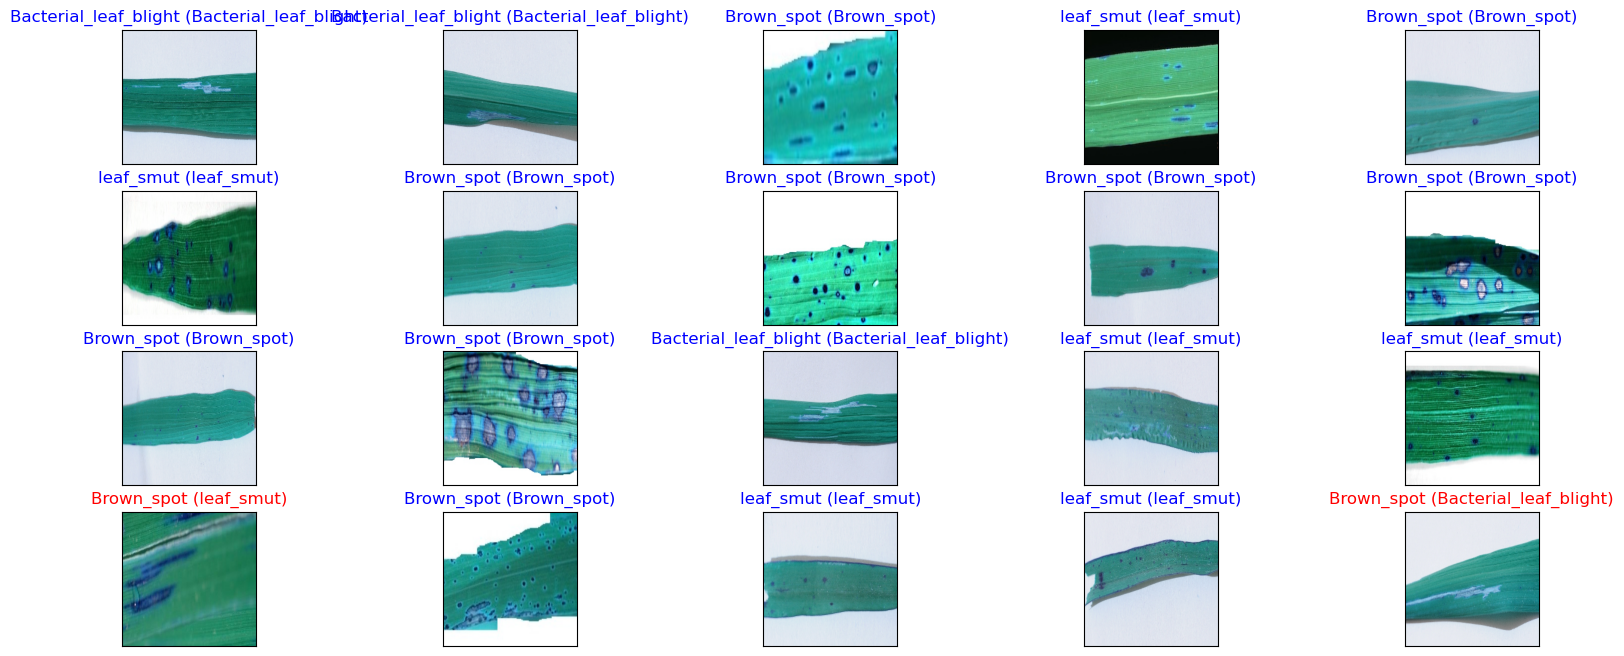

In [224]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=20, replace=False)):
    ax = fig.add_subplot(4,5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(model_labels[pred_idx], model_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

# ANN

In [225]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import tensorflow as tf
import matplotlib.pyplot as plt

# Define the ANN model
model_ann = Sequential()
model_ann.add(Flatten(input_shape=(224, 224, 3)))
model_ann.add(Dense(512, activation='relu'))
model_ann.add(Dropout(0.5))
model_ann.add(Dense(256, activation='relu'))
model_ann.add(Dropout(0.3))
model_ann.add(Dense(3, activation='softmax'))

# Compile the model
model_ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_ann = model_ann.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100,
                             callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,
                                                                       restore_best_weights=True))

# Evaluate the model
result_ann = model_ann.evaluate(x_test, y_test, verbose=0)
accuracy_ann = 100 * result_ann[1]
print('Test accuracy (ANN): %.4f%%' % accuracy_ann)




Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.3556 - loss: 88.6509 - val_accuracy: 0.3333 - val_loss: 95.5442
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3170 - loss: 96.0430 - val_accuracy: 0.5000 - val_loss: 6.8277
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 942ms/step - accuracy: 0.2542 - loss: 84.9173 - val_accuracy: 0.3333 - val_loss: 39.9650
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 873ms/step - accuracy: 0.3499 - loss: 87.6628 - val_accuracy: 0.3333 - val_loss: 22.4078
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 864ms/step - accuracy: 0.3976 - loss: 80.4324 - val_accuracy: 0.4667 - val_loss: 21.3440
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 867ms/step - accuracy: 0.4037 - loss: 73.2515 - val_accuracy: 0.3333 - val_loss: 35.4297
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 945ms/step - accuracy: 0.4371 - loss: 54.5286 - val_accuracy: 0.5667 - val_loss: 4.1644
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 876ms/step - accuracy: 0.3863 - loss: 44.1428 - val_accuracy: 0.3

In [226]:
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


In [227]:
model_labels = ['Bacterial_leaf_blight','Brown_spot','leaf_smut']

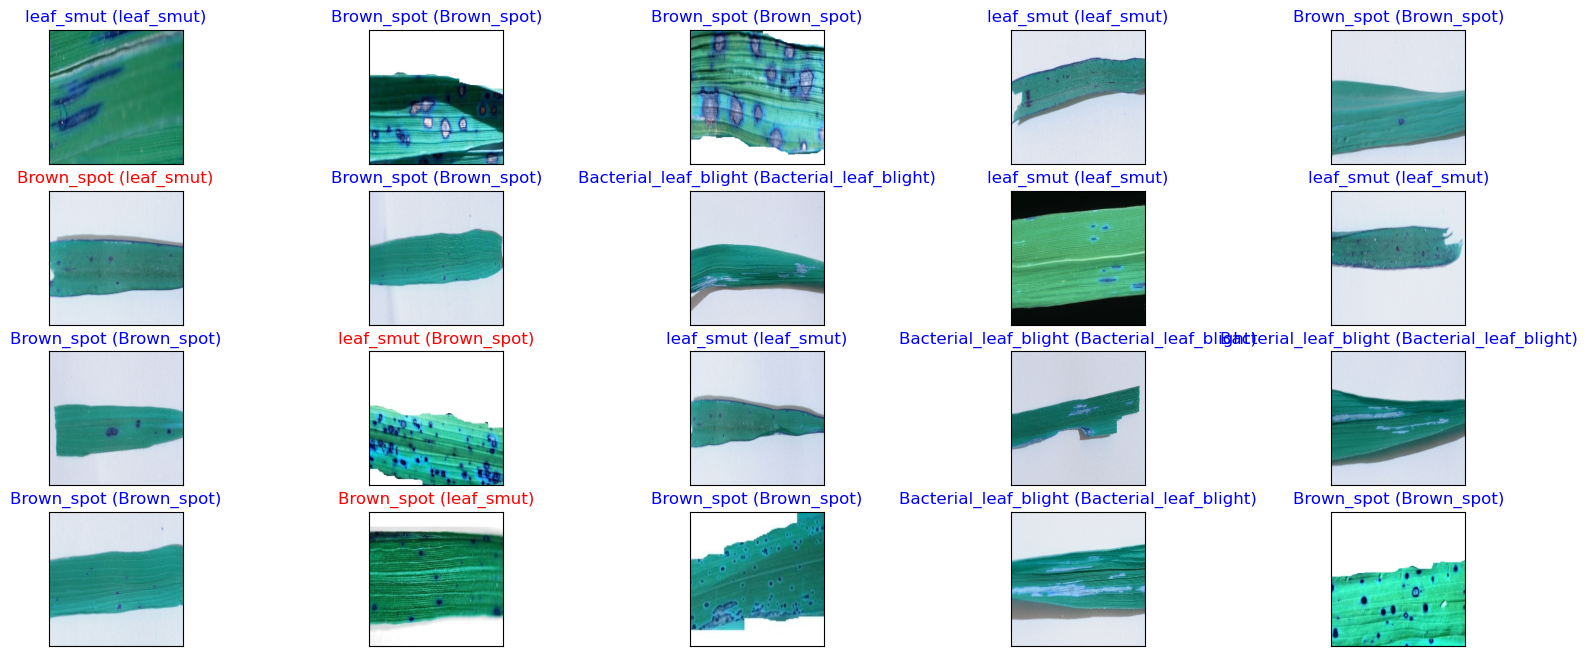

In [105]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=20, replace=False)):
    ax = fig.add_subplot(4,5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(model_labels[pred_idx], model_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

## Conclusion

### The CNN model achieved an accuracy of 86%, indicating strong performance in classifying the image dataset. This high accuracy demonstrates the model's effectiveness in learning distinguishing features. To further improve, consider data augmentation, hyperparameter tuning, and using more data. Overall, the model is reliable for practical applications in image classification.

## Challanges faced

### We faced that  limited dataset size leading to overfitting, class imbalance causing bias towards frequent classes, variability in image quality affecting consistent feature learning, and the complexity of subtle features making it hard for the model to differentiate between classes effectively.